In [12]:
import json

def read_json_from_file(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data
# cyton_dict = read_json_from_file("../results/open-close-2024-08-07-09-08-23/6249/8-data.json")
# cyton_dict = read_json_from_file("../results/open-close-open-2024-08-07-09-09-52/7499/8-data.json")
# cyton_dict = read_json_from_file("..//results/2024-08-07-09-53-55/7499/0-data.json")
# cyton_dict = read_json_from_file("../results/2024-08-07-14-19-24/7499/8-data.json")
# cyton_dict = read_json_from_file("../results/2024-08-08-10-21-46/7499/8-data.json")
# cyton_dict = read_json_from_file("../results/2024-08-13-09-33-11/7499/0-data.json")
# cyton_dict = read_json_from_file("../results/2024-08-13-09-36-39/7499/8-data.json")
cyton_time, cyton_raw = cyton_dict["window_begin_time"], cyton_dict["Fp1"]
data = cyton_raw

FileNotFoundError: [Errno 2] No such file or directory: '..//results/2024-08-07-09-53-55/7499/0-data.json'

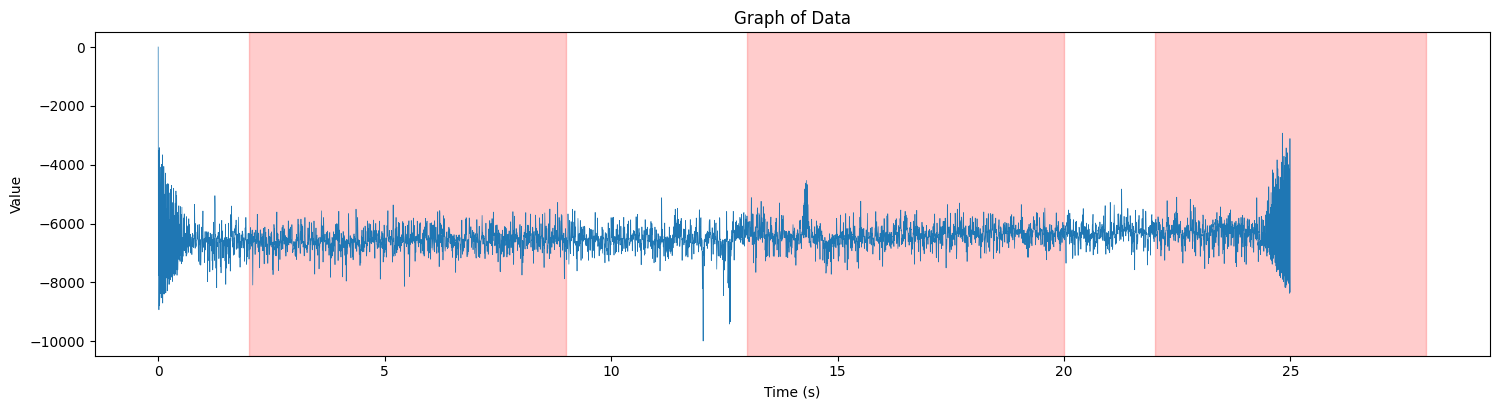

In [ ]:
import matplotlib.pyplot as plt

time = [i/250 for i in range(len(data))]
# periods = [ (2, 9), (13, 20), (23, 24) ]
periods = [ (2, 9), (13, 20), (22, 28) ]

plt.figure(figsize=(18, 4.2))
plt.plot(time, data, linewidth=0.5)
for period in periods:
    plt.axvspan(period[0], period[1], color='red', alpha=0.2)
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Graph of Data')
plt.show()

In [ ]:
open1 = data[periods[0][0]*250:periods[0][1]*250]
closed = data[periods[1][0]*250:periods[1][1]*250]
open2 = data[periods[2][0]*250:periods[2][1]*250]

# Calculate the mean for each section
mean_open1 = sum(open1) / len(open1)
mean_closed = sum(closed) / len(closed)
mean_open2 = sum(open2) / len(open2)

# Calculate the average deviation from the mean for each section
deviation_open1 = sum(abs(value - mean_open1) for value in open1) / len(open1)
deviation_closed = sum(abs(value - mean_closed) for value in closed) / len(closed)
deviation_open2 = sum(abs(value - mean_open2) for value in open2) / len(open2)

# Print the results
print("Average deviation from mean for open1:", deviation_open1)
print("Average deviation from mean for closed:", deviation_closed)
print("Average deviation from mean for open2:", deviation_open2)

Average deviation from mean for open1: 236.267349259885
Average deviation from mean for closed: 244.79163983122575
Average deviation from mean for open2: 404.97097729768416


C:\Users\K100\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 2048 is greater than input length  = 1750, using nperseg = 1750
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
C:\Users\K100\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 2048 is greater than input length  = 750, using nperseg = 750
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


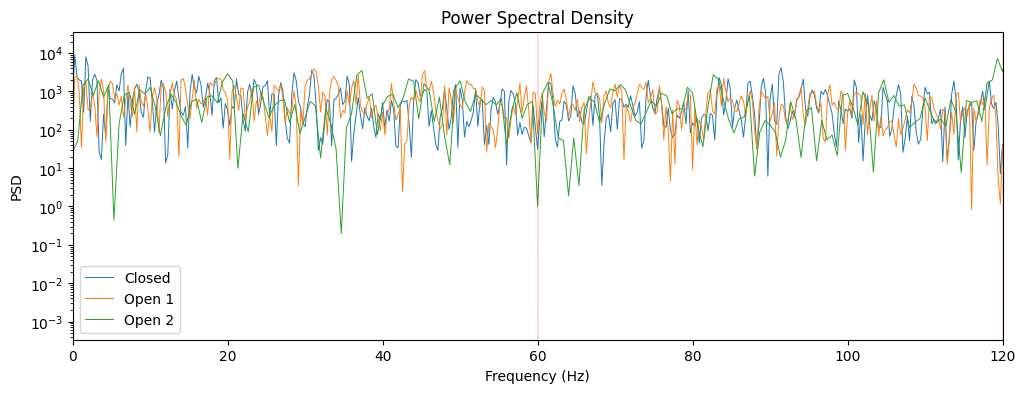

In [ ]:
import numpy as np
from scipy import signal

# Calculate the PSD for the 'closed' data
frequencies_closed, psd_closed = signal.welch(closed, fs=500, nperseg=2048)

# Calculate the PSD for the 'open1' data
frequencies_open1, psd_open1 = signal.welch(open1, fs=500, nperseg=2048)

# Calculate the PSD for the 'open2' data
frequencies_open2, psd_open2 = signal.welch(open2, fs=500, nperseg=2048)

plt.figure(figsize=(12, 4))
plt.semilogy(frequencies_closed, psd_closed, label='Closed', linewidth=0.7)
plt.semilogy(frequencies_open1, psd_open1, label='Open 1', linewidth=0.7)
plt.semilogy(frequencies_open2, psd_open2, label='Open 2', linewidth=0.7)
plt.axvline(x=60, color='red', linestyle='--', linewidth=0.3)  # Add a vertical line at 60 Hz
plt.axvline(x=120, color='red', linestyle='--', linewidth=0.3)  # Add a vertical line at 120 Hz
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Power Spectral Density')
plt.legend()
plt.xlim(0, 120)
plt.show()


Text(0.5, 0, 'Time (s)')

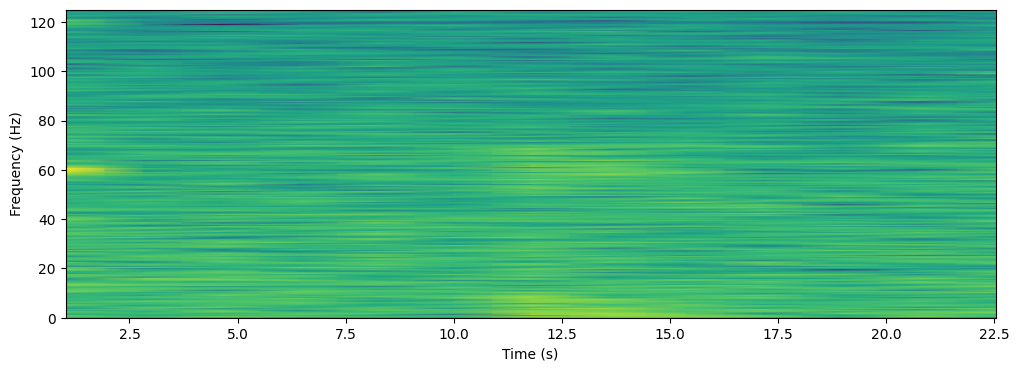

In [ ]:
# spectrogram

f, t, Sxx = signal.spectrogram(np.array(data), 250, nperseg=512)
plt.figure(figsize=(12, 4))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')